# CSV to SQL

In [ ]:
"""import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sales.csv', 'sales'),
    ('products.csv', 'products'),
    ('delivery.csv', 'delivery'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='your_host',
    user='your_username',
    password='your_password',
    database='your_database'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'path_to_your_folder'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()"""

# 1.List all unique cities where customers are located. 

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "878787",
                            database = "project1")
cur = db.cursor()


In [5]:
query = """select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data
 

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.


In [8]:
query = """select count(*) from orders
where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

data[0][0]

45101

# 3. Find the total sales of top 5 category.


               Category       Sales
0        BED TABLE BATH  1712553.67
1         HEALTH BEAUTY  1657373.12
2  COMPUTER ACCESSORIES  1585330.45
3  FURNITURE DECORATION  1430176.39
4       WATCHES PRESENT  1429216.68


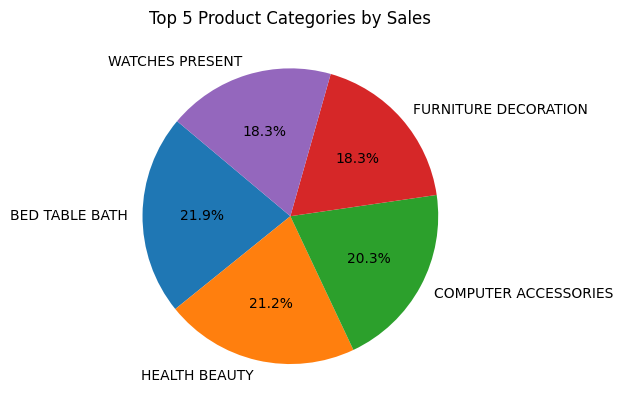

In [103]:
query = """select upper(products.product_category), round(sum(payments.payment_value),2)
from products join order_items on products.product_id = order_items.product_id
join payments on Payments.order_id = order_items.order_id
group by products.product_category
order by round(sum(payments.payment_value),2) desc
limit 5"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data , columns = ["Category", "Sales"])
print(df)
plt.pie(df['Sales'], labels=df['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Product Categories by Sales')

# Show the plot
plt.show()


# 4. Calculate the percentage of orders that were paid in installments.


In [17]:
query = """WITH InstallmentOrders AS (select payments.order_id, sum(payments.payment_installments) 
from payments 
group by payments.order_id
having  sum(payments.payment_installments) >1)

select 
(select count(*) from InstallmentOrders)* 100 / (select count(distinct payments.order_id)from payments)"""

cur.execute(query)

data = cur.fetchall()

print ("percentage of orders that were paid in installments is", data[0][0])

percentage of orders that were paid in installments is 53.4735


# 5. Count the number of customers from each state. 


   States  Number of customers
0      SP                41746
4      RJ                12852
2      MG                11635
5      RS                 5466
3      PR                 5045
1      SC                 3637
9      BA                 3380
13     DF                 2140
8      ES                 2033
7      GO                 2020
15     PE                 1652
12     CE                 1336
6      PA                  975
16     MT                  907
10     MA                  747
11     MS                  715
21     PB                  536
23     PI                  495
14     RN                  485
19     AL                  413
25     SE                  350
22     TO                  280
20     RO                  253
17     AM                  148
24     AC                   81
18     AP                   68
26     RR                   46


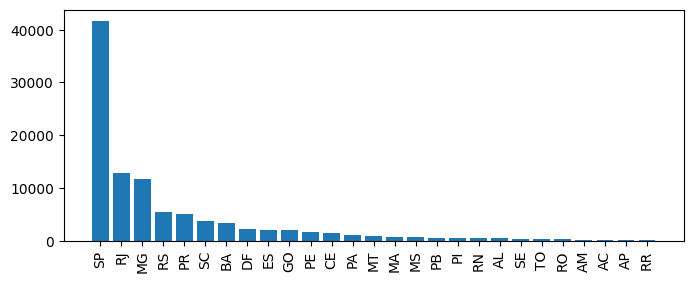

In [34]:
query = """select customers.customer_state, count(customers.customer_id) 
from customers 
group by customers.customer_state"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns =["States" , "Number of customers"])
df = df.sort_values(by = "Number of customers", ascending = False)
print(df)
plt.figure(figsize = (8,3))
plt.bar(df["States"], df["Number of customers"])
plt.xticks(rotation = 90)
plt.show()

# 6. Calculate the number of orders per month in 2018.


      Months  Number of Orders
0      April              6939
1     August              6512
2   February              6728
3    January              7269
4       July              6292
5       June              6167
6      March              7211
7        May              6873
8    October                 4
9  September                16


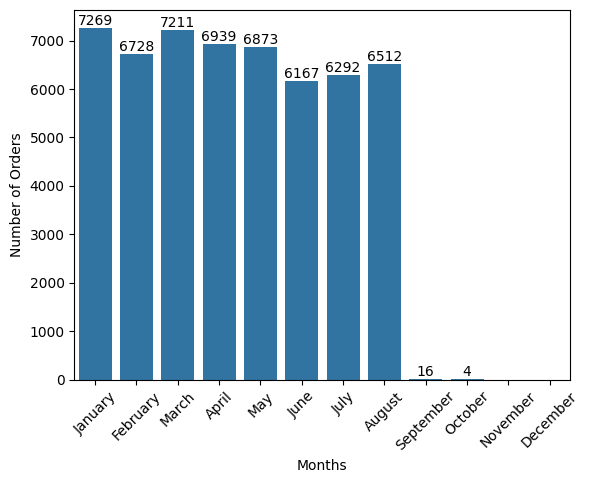

In [44]:
query = """SELECT monthname(orders.order_purchase_timestamp), count(orders.order_id)
from orders 
where year(orders.order_purchase_timestamp) = 2018
group by monthname(orders.order_purchase_timestamp)
order by monthname(orders.order_purchase_timestamp)"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns =["Months" , "Number of Orders"])
print(df)
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax = sns.barplot(x =df["Months"],y =df["Number of Orders"], data = df, order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

# 7. Find the average number of products per order, grouped by customer city.


In [50]:
query = """with CPO as (SELECT orders.order_id,orders.customer_id, count(order_items.order_id) as oc
FROM orders join order_items 
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(CPO.oc),2)
from CPO join customers 
on cpo.customer_id = customers.customer_id
group by customers.customer_city"""

cur.execute(query)

data = cur.fetchall()
df  = pd.DataFrame(data)
df.head(10)


,0,1
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
5,rio de janeiro,1.15
6,mario campos,1.33
7,guariba,1.00
8,cuiaba,1.20
9,franca,1.25


# 8. Calculate the percentage of total revenue contributed by each product category.


In [54]:
query = """select upper(products.product_category), (sum(payments.payment_value)*100/(select sum(payments.payment_value) from Payments)) as per
from payments join order_items
on payments.order_id = order_items.order_id 
join products on products.product_id = order_items.product_id
group by upper(products.product_category)
order by per desc"""

cur.execute(query)

data = cur.fetchall()
df  = pd.DataFrame(data, columns =["Category" , "Percentage of Total Sales"])
df.head(10)


,Category,Percentage of Total Sales
0,BED TABLE BATH,10.697529
1,HEALTH BEAUTY,10.352841
2,COMPUTER ACCESSORIES,9.902824
3,FURNITURE DECORATION,8.933649
4,WATCHES PRESENT,8.927654
5,SPORT LEISURE,8.695975
6,HOUSEWARES,6.838446
7,AUTOMOTIVE,5.323887
8,GARDEN TOOLS,5.236351
9,COOL STUFF,4.870412


# 9. Identify the correlation between product price and the number of times a product has been purchased.


                           Category  No of Orders  Avg price
0                     HEALTH BEAUTY          9670     130.16
1                     SPORT LEISURE          8641     114.34
2                        COOL STUFF          3796     167.36
3              COMPUTER ACCESSORIES          7827     116.51
4                   WATCHES PRESENT          5991     201.14
..                              ...           ...        ...
69                          FLOWERS            33      33.64
70  KITCHEN PORTABLE AND FOOD COACH            15     264.57
71                  HOUSE COMFORT 2            30      25.34
72       CITTE AND UPHACK FURNITURE            38     114.95
73                   CDS MUSIC DVDS            14      52.14

[74 rows x 3 columns]


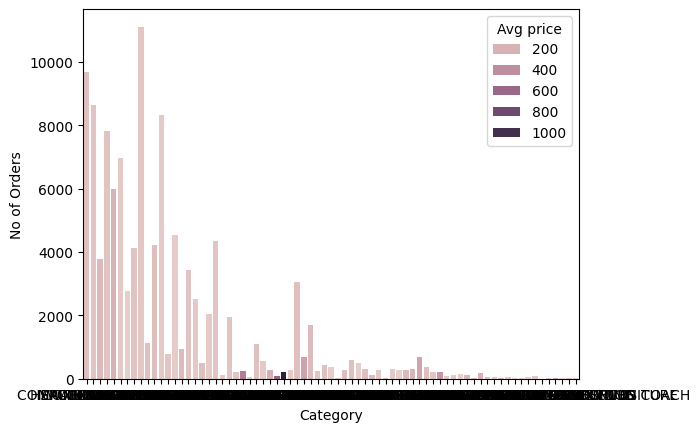

Correlation between product price and the number of times a product has been purchased is  -0.11


In [71]:
query = """SELECT upper(products.product_category), count(order_items.order_id), round(avg(order_items.price),2) 
FROM order_items join products
on order_items.product_id = products.product_id
group by upper(products.product_category);"""

cur.execute(query)

data = cur.fetchall()
df  = pd.DataFrame(data, columns =["Category" , "No of Orders", "Avg price"])
print(df)
ax = sns.barplot(x =df["Category"],y =df["No of Orders"], data = df, hue = df["Avg price"])
plt.show()
arr1 = df["No of Orders"]
arr2 = df["Avg price"]
a = np.corrcoef([arr1,arr2])
print("Correlation between product price and the number of times a product has been purchased is ", round(a[0][1],2))


# 10. Calculate the total revenue generated by each seller, and rank them by revenue.


                          Seller Id        Revenue  Rank
0  7c67e1448b00f6e969d365cea6b010ab  507166.907302     1
1  1025f0e2d44d7041d6cf58b6550e0bfa  308222.039840     2
2  4a3ca9315b744ce9f8e9374361493884  301245.269765     3
3  1f50f920176fa81dab994f9023523100  290253.420128     4
4  53243585a1d6dc2643021fd1853d8905  284903.080498     5
5  da8622b14eb17ae2831f4ac5b9dab84a  272219.319315     6
6  4869f7a5dfa277a7dca6462dcf3b52b2  264166.120939     7
7  955fee9216a65b617aa5c0531780ce60  236322.300502     8
8  fa1c13f2614d7b5c4749cbc52fecda94  206513.229870     9
9  7e93a43ef30c4f03f38b393420bc753a  185134.209706    10


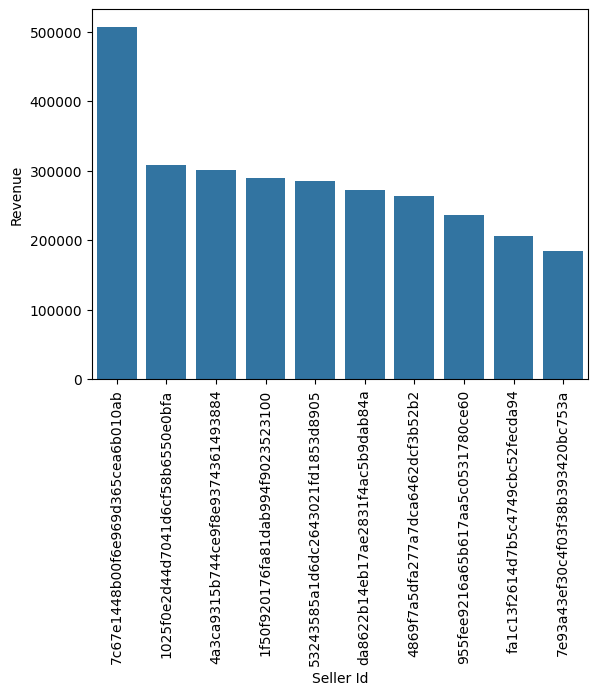

In [77]:
query = """select *, dense_rank() over(order by revenue desc)
from (SELECT sellers.seller_id, sum(payments.payment_value) revenue
FROM sellers join order_items 
on sellers.seller_id = order_items.seller_id
join payments on order_items.order_id = payments.order_id
group by sellers.seller_id) as a """

cur.execute(query)

data = cur.fetchall()
df  = pd.DataFrame(data, columns =["Seller Id" , "Revenue", "Rank"])
df = df.head(10)
print(df)
sns.barplot(x ="Seller Id", y = "Revenue", data = df )
plt.xticks(rotation = 90)
plt.show()

# 11. Calculate the moving average of order values for each customer over their order history.


In [79]:
query = """select customer_id, ts, payment, avg(payment) over (partition by customer_id order by ts 
rows between 2 preceding and current row)as mov_avg
from (SELECT orders.customer_id, orders.order_purchase_timestamp as ts, payments.payment_value as payment
FROM orders join payments
on orders.order_id = payments.order_id) as a """

cur.execute(query)

data = cur.fetchall()
df  = pd.DataFrame(data, columns =["Customer_ID" , "TimeStamp", "Payment Value", "Moving_Avg"])

df

,Customer_ID,TimeStamp,Payment Value,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# 12. Calculate the cumulative sales per month for each year.


In [85]:
query = """select y, m , round(payment,2) , Round(sum(payment) over (partition by y order by y, m),2)
from (select year(orders.order_purchase_timestamp) y, month(orders.order_purchase_timestamp) m, sum(payments.payment_value) as payment
from orders join payments
on orders.order_id = payments.order_id
group by y, m  
order by y, m) as a"""

cur.execute(query)

data = cur.fetchall()
df  = pd.DataFrame(data, columns =["Year" , "Month", "Payment_Value", "Cum Sum"])

df



,Year,Month,Payment_Value,Cum Sum
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,138488.04
4,2017,2,291908.01,430396.05
5,2017,3,449863.60,880259.65
6,2017,4,417788.03,1298047.68
7,2017,5,592918.82,1890966.50
8,2017,6,511276.38,2402242.88
9,2017,7,592382.92,2994625.80


# 13. Calculate the year-over-year growth rate of total sales.


In [92]:
query = """with a as(select year(orders.order_purchase_timestamp) y, sum(payments.payment_value) as payment
from orders join payments
on orders.order_id = payments.order_id
group by y  
order by y) 

select y, (payment - lag(payment,1) over (order by y))*100/lag(payment,1) over (order by y) from a
"""

cur.execute(query)

data = cur.fetchall() 
df = pd.DataFrame(data)
df

,0,1
0,2016,NaN
1,2017,12112.703760
2,2018,20.000924


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [93]:
query = """with a as (SELECT distinct customers.customer_id, min(orders.order_purchase_timestamp) as first_order 
FROM customers join orders 
on customers.customer_id = orders.customer_id 
group by customers.customer_id),

b as ( SELECT distinct a.customer_id, count(distinct orders.order_purchase_timestamp)
FROM a join orders 
on a.customer_id = orders.customer_id 
where orders.order_purchase_timestamp > a.first_order
and orders.order_purchase_timestamp < date_add(a.first_order , interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/ count( distinct b.customer_id)) as Retention_Rate from 
a left join b on a.customer_id = b.customer_id """

cur.execute(query)

data = cur.fetchall() 
df = pd.DataFrame(data)
df



,0
0,None


# 15. Identify the top 3 customers who spent the most money in each year.

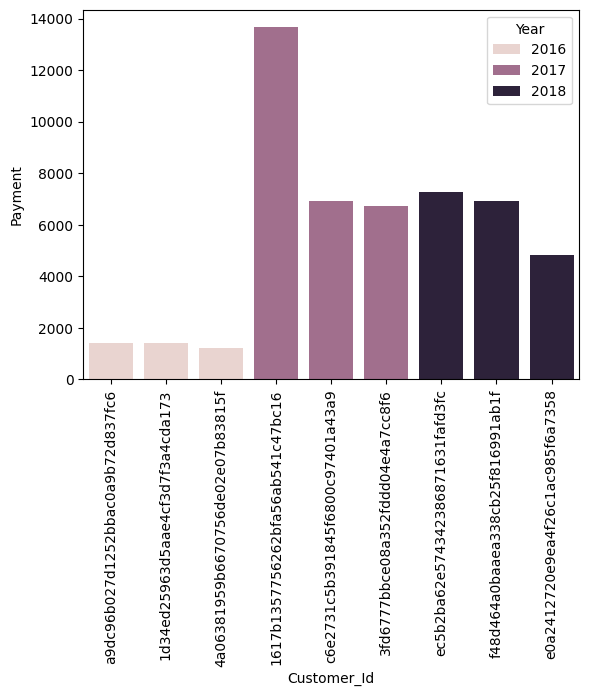

In [100]:
query = """select years,customer_id, payment, d_rank
from (select year(orders.order_purchase_timestamp) years,
orders.customer_id, sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp) 
order by sum(payments.payment_value) desc) d_rank 
from orders join payments 
on orders.order_id = payments.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3; """

cur.execute(query)

data = cur.fetchall() 
df = pd.DataFrame(data , columns = ["Year","Customer_Id","Payment","Rank"])
sns.barplot(x = "Customer_Id", y = "Payment" , data = df , hue = "Year")

plt.xticks(rotation = 90 )      
plt.show()